In [37]:
import numpy as np
from PIL import Image

In [38]:
def upsample_image(image, m):
    input_image = np.array(image)

    height, width = input_image.shape[:2]

    new_width = width * m
    new_height = height * m

    output_image = np.zeros((new_height, new_width, input_image.shape[2]),
                            dtype=input_image.dtype)

    for output_i in range(new_height):
        for output_j in range(new_width):
            input_i = output_i // m
            input_j = output_j // m

            output_image[output_i][output_j] = input_image[input_i][input_j]

    return Image.fromarray(output_image)


In [39]:
def downsample_image(image, n):
    input_image = np.array(image)

    height, width = input_image.shape[:2]

    new_width = width // n
    new_height = height // n

    output_image = np.zeros((new_height, new_width, input_image.shape[2]),
                            dtype=input_image.dtype)

    for output_i in range(new_height):
        for output_j in range(new_width):
            input_i = output_i * n
            input_j = output_j * n

            output_image[output_i][output_j] = input_image[input_i][input_j]

    return Image.fromarray(output_image)


In [40]:
def resample_image(image, m, n):
    return downsample_image(upsample_image(image, m), n)

In [41]:
def one_pass_resample_image(image, m, n):
    input_image = np.array(image)

    height, width = input_image.shape[:2]

    new_height = height * m // n
    new_width = width * m // n

    output_image = np.zeros((new_height, new_width, input_image.shape[2]),
                            dtype=input_image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            input_i = i * n // m
            input_j = j * n // m

            output_image[i][j] = input_image[input_i][input_j]

    return Image.fromarray(output_image) 

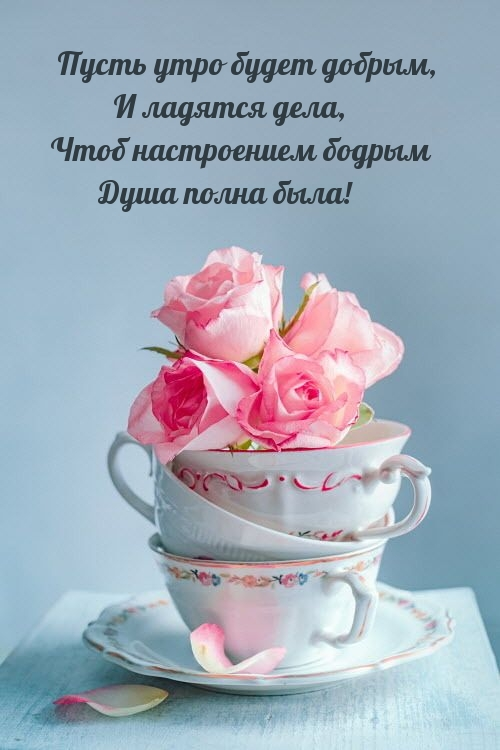

In [42]:
image = Image.open("input/image.png")
image

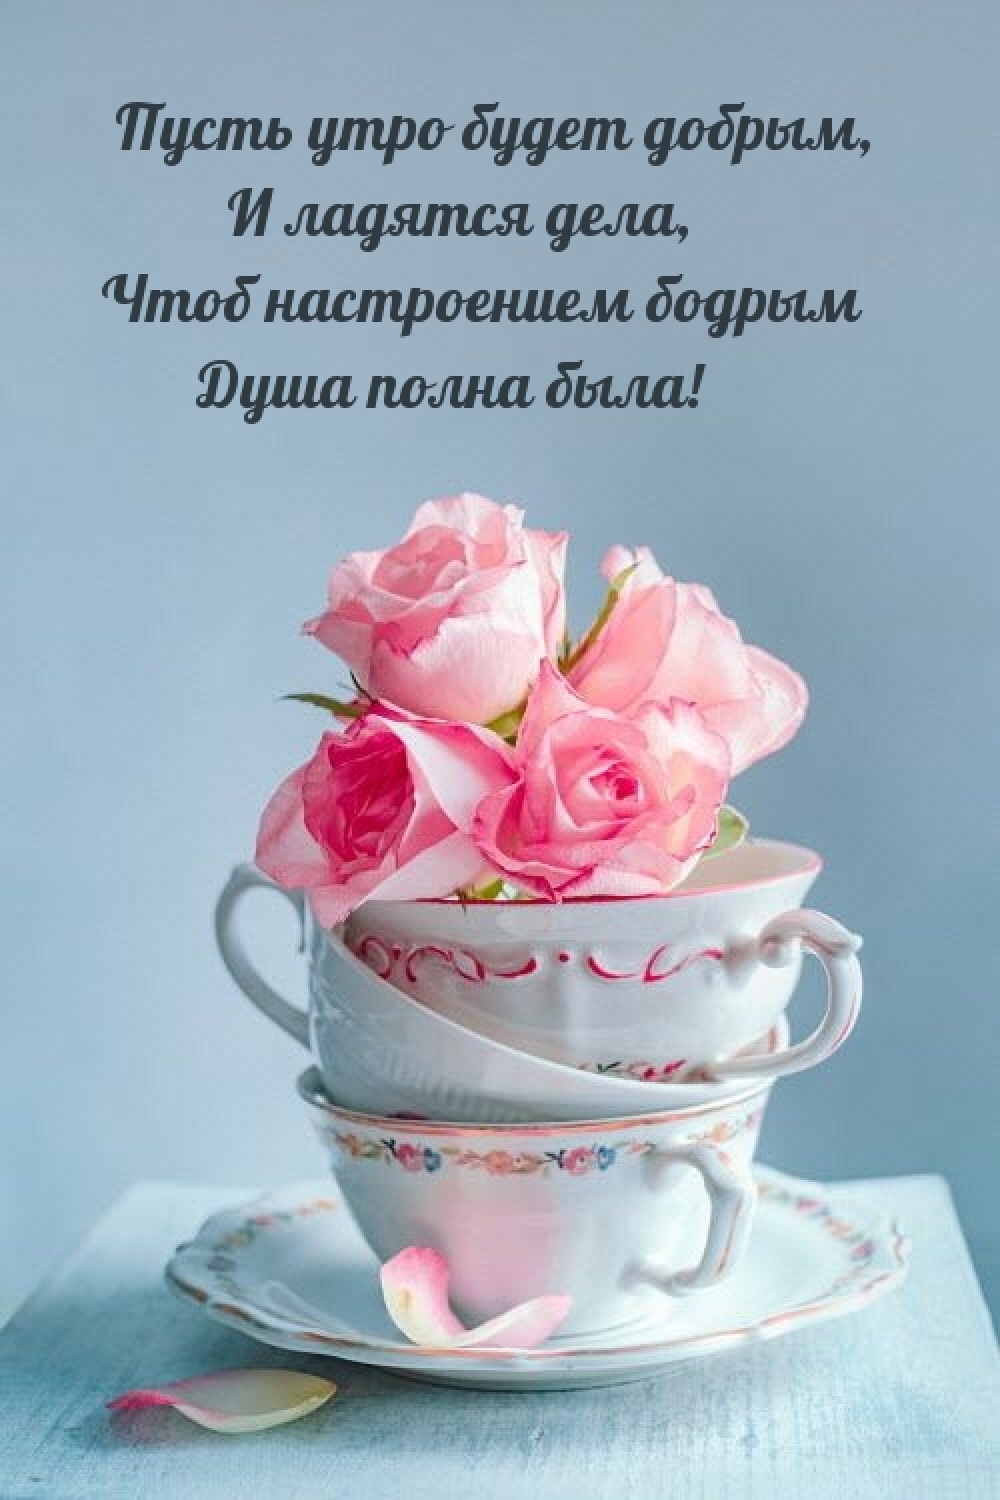

In [43]:
upsample_image(image, 2)

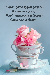

In [44]:
downsample_image(image, 10)


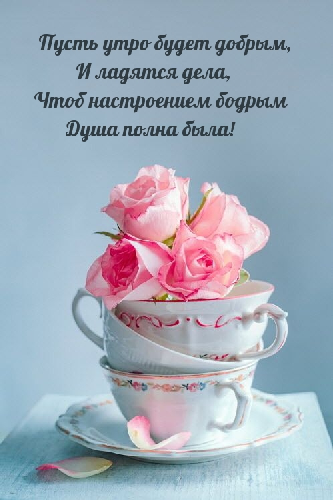

In [45]:
resample_image(image, 2, 3)

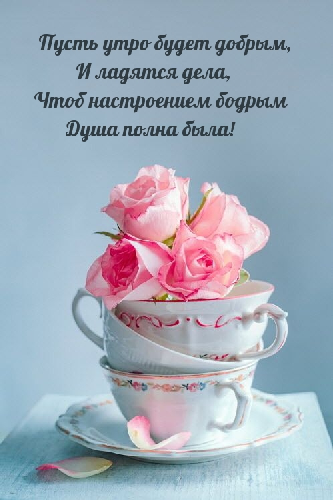

In [46]:
one_pass_resample_image(image, 2, 3)